In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

# bdd

In [3]:
bdd = pd.read_csv("/neurospin/dico/jchavas/Runs/61_classifier_regresser/Output/flanker/summary/bdd_2023-09-26_lobule_parietal_sup.csv", index_col=0)
bdd = bdd.sort_values(by=['best_test_auc'], ascending=False)

In [4]:
len(bdd)

45

AUC = 0.5152092352092351 +/- 0.01318653848670761
AUC-1 = 0.509033189033189 +/- 0.02142592333300767
AUC-2 = 0.5152092352092351 +/- 0.01318653848670761
AUC (best model) = 0.5100721500721501 +/- 0.02299186324287404


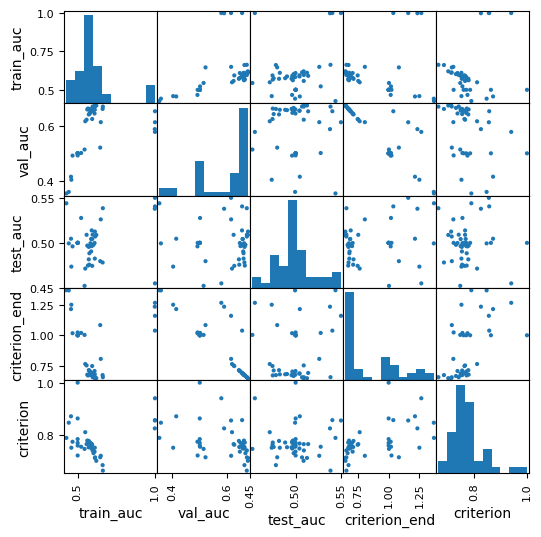

In [5]:
bdd["criterion"] = abs(bdd["best_val_auc"] - bdd["best_train_auc"]) + 2*(1-bdd["best_val_auc"])
bdd["criterion_end_old"] = abs(bdd["val_auc"] - bdd["train_auc"]) + 2*(1-bdd["val_auc"])
bdd["criterion_end"] = bdd.apply(lambda x: 2*(1-x["val_auc"]) + max(-x["val_auc"] + x["train_auc"], 0), axis=1)
best_end = bdd.sort_values(by=['criterion_end'], ascending=True)[:5]
best_end_old = bdd.sort_values(by=['criterion_end_old'], ascending=True)[:5]
best_val_end = bdd.sort_values(by=['val_auc'], ascending=False)[:5]
best_best = bdd.sort_values(by=['criterion'], ascending=True)[:5]
print(f"AUC = {best_end['test_auc'].mean()} +/- {best_end['test_auc'].std()}")
print(f"AUC-1 = {best_end_old['test_auc'].mean()} +/- {best_end_old['test_auc'].std()}")
print(f"AUC-2 = {best_val_end['test_auc'].mean()} +/- {best_val_end['test_auc'].std()}")
print(f"AUC (best model) = {best_best['best_test_auc'].mean()} +/- {best_best['best_test_auc'].std()}")
obj = pd.plotting.scatter_matrix(bdd[['train_auc', 'val_auc', 'test_auc', 'criterion_end', 'criterion']],
                                 figsize=(6,6),
                                 alpha=1.0)

In [6]:
best_end = bdd.sort_values(by=['criterion_end'], ascending=True)[:5]
best_end_old = bdd.sort_values(by=['criterion_end_old'], ascending=True)[:5]
best_val_end = bdd.sort_values(by=['val_auc'], ascending=False)[:5]
best_best = bdd.sort_values(by=['criterion'], ascending=True)[:5]
print(f"AUC = {best_end['test_auc'].mean()} +/- {best_end['test_auc'].std()}")
print(f"AUC-1 = {best_end_old['test_auc'].mean()} +/- {best_end_old['test_auc'].std()}")
print(f"AUC-2 = {best_val_end['test_auc'].mean()} +/- {best_val_end['test_auc'].std()}")
print(f"AUC (best model) = {best_best['best_test_auc'].mean()} +/- {best_best['best_test_auc'].std()}")

AUC = 0.5152092352092351 +/- 0.01318653848670761
AUC-1 = 0.509033189033189 +/- 0.02142592333300767
AUC-2 = 0.5152092352092351 +/- 0.01318653848670761
AUC (best model) = 0.5100721500721501 +/- 0.02299186324287404


Text(0, 0.5, 'best_test_auc')

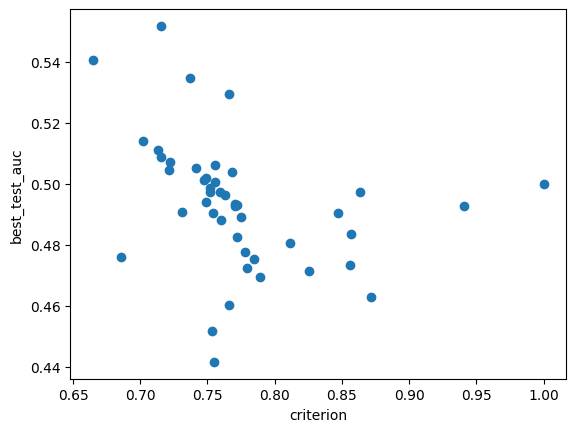

In [7]:
plt.scatter(bdd["criterion"], bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

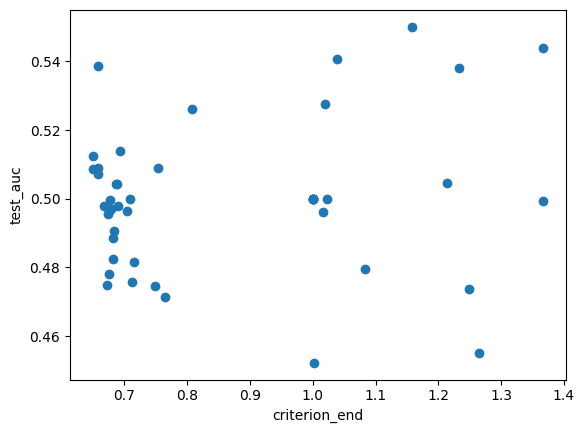

In [8]:
plt.scatter(bdd["criterion_end"], bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
# plt.xlim((0.75,0.85))

Text(0, 0.5, 'val_auc')

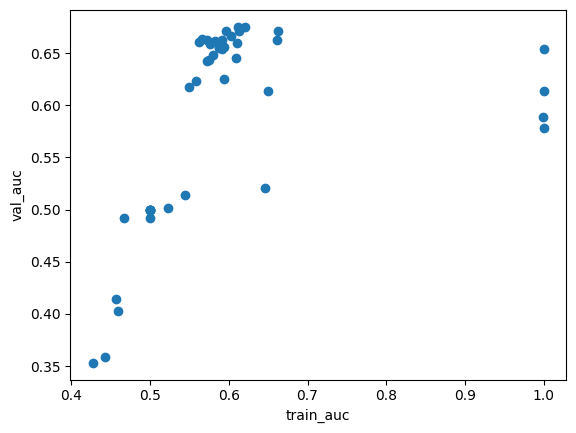

In [9]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

Text(0, 0.5, 'criterion')

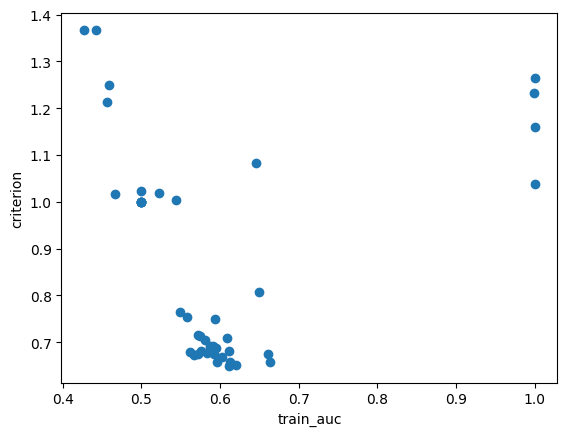

In [10]:
plt.scatter(bdd.train_auc, bdd.criterion_end)
plt.xlabel("train_auc")
plt.ylabel("criterion")

Text(0, 0.5, 'test_auc')

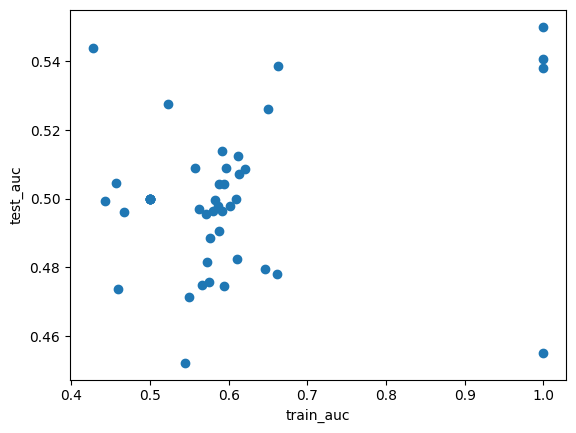

In [11]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

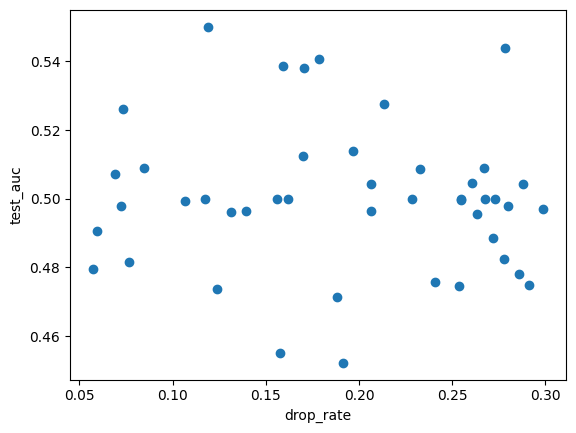

In [12]:
plt.scatter(bdd.drop_rate, bdd.test_auc)
plt.xlabel("drop_rate")
# plt.xscale("log")
plt.ylabel("test_auc")
# plt.xlim((0.75,0.85))

Text(0, 0.5, 'test_auc')

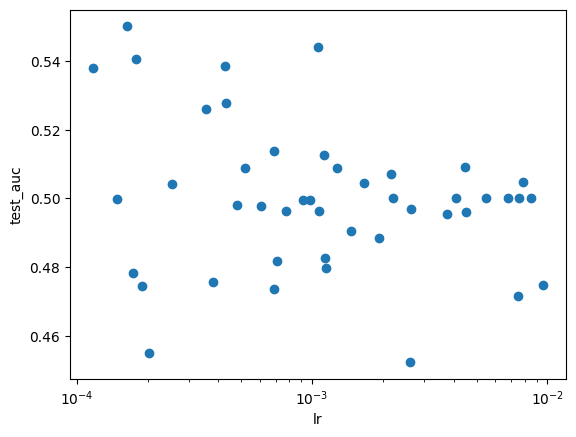

In [13]:
plt.scatter(bdd.lr, bdd.test_auc)
plt.xlabel("lr")
plt.xscale("log")
plt.ylabel("test_auc")
# plt.xlim((0.75,0.85))

(0.7, 0.85)

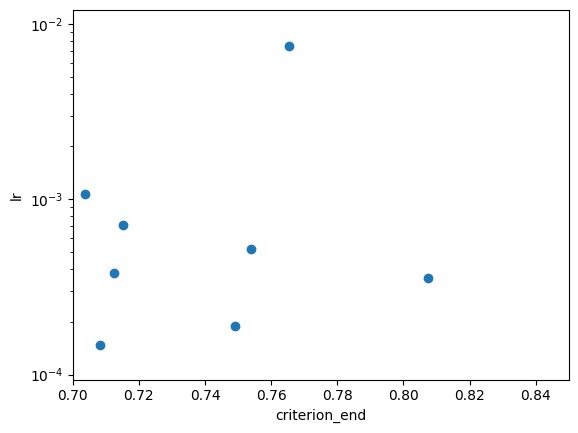

In [14]:
plt.scatter(bdd["criterion_end"], bdd.lr)
plt.xlabel("criterion_end")
plt.ylabel("lr")
plt.yscale("log")
plt.xlim((0.7,0.85))

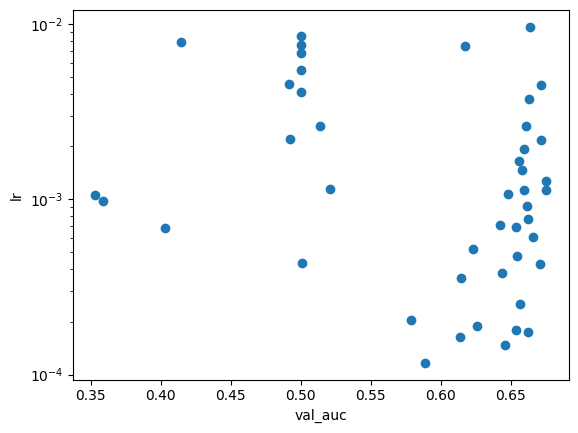

In [15]:
plt.scatter(bdd["val_auc"], bdd.lr)
plt.xlabel("val_auc")
plt.ylabel("lr")
plt.yscale("log")

(0.7, 0.85)

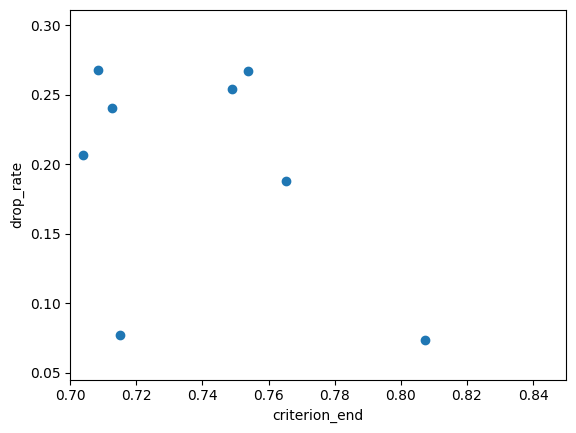

In [16]:
plt.scatter(bdd["criterion_end"], bdd.drop_rate)
plt.xlabel("criterion_end")
plt.ylabel("drop_rate")
# plt.yscale("log")
plt.xlim((0.7,0.85))

In [17]:
quantile = []
test_auc = []
test_auc_cum = []
error_cum = []
error = []
delta=0.1
quantile_x = np.arange(delta,1+delta,delta)
print(quantile_x)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].mean())
    error_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].sem())
    if q==delta:
        test_auc.append(test_auc_cum[-1])
        error.append(error_cum[-1])
    else:
        test_auc.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].mean())
        error.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].sem())

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [18]:
test_auc

[0.5152092352092351,
 0.49112554112554113,
 0.48914862914862917,
 0.4992424242424242,
 0.4964646464646465,
 0.49252525252525253,
 nan,
 0.49733846400513065,
 0.5187229437229437,
 0.49148629148629147]

In [19]:
error

[0.005897199288839084,
 0.005480081775399183,
 0.004083566608078756,
 0.0032754199161886795,
 0.007866784556604868,
 0.010694325035347564,
 nan,
 0.006455364755408561,
 0.016290305582108394,
 0.017969762111095897]

Text(0, 0.5, 'test_auc')

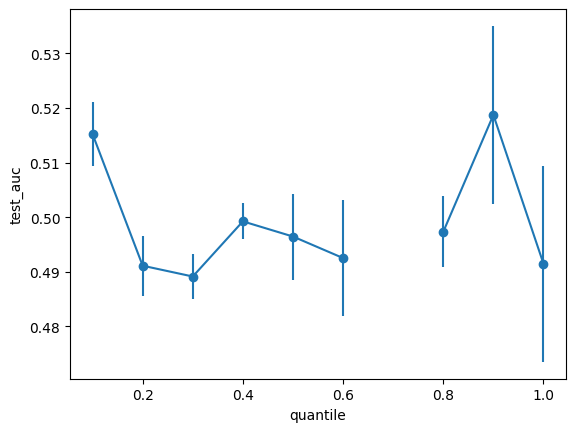

In [20]:
plt.errorbar(quantile_x, test_auc, error, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc")
# plt.ylim((0.45,0.6))

(0.45, 0.6)

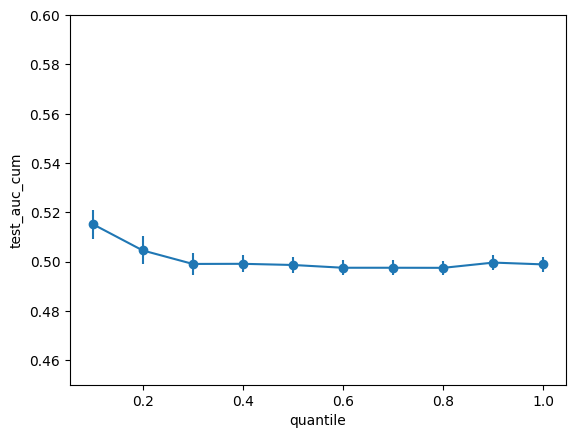

In [21]:
plt.errorbar(quantile_x, test_auc_cum, error_cum, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc_cum")
plt.ylim((0.45,0.6))

Text(0, 0.5, 'test_auc')

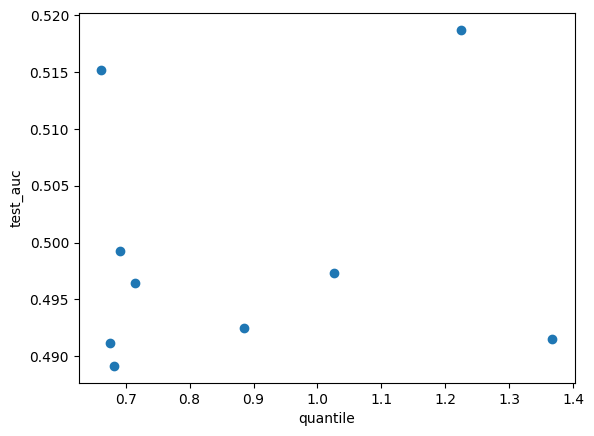

In [22]:
plt.scatter(quantile, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

In [23]:
best_quantile = []
best_test_auc = []
for q in quantile_x:
    one_quantile = bdd['criterion'].quantile(q=q)
    best_quantile.append(one_quantile)
    best_test_auc.append(bdd[bdd['criterion'] < one_quantile]['best_test_auc'].mean())

Text(0, 0.5, 'best_test_auc')

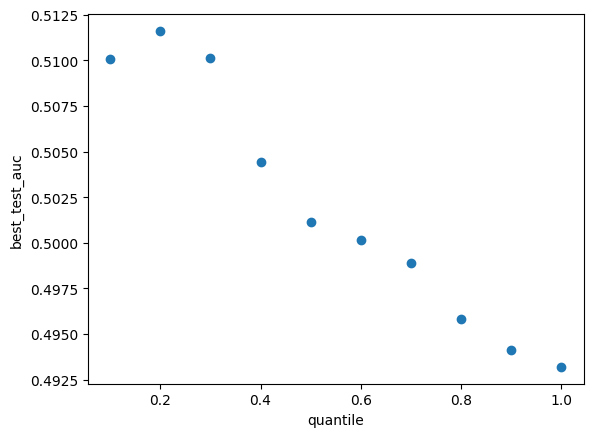

In [24]:
plt.scatter(quantile_x, best_test_auc)
plt.xlabel("quantile")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

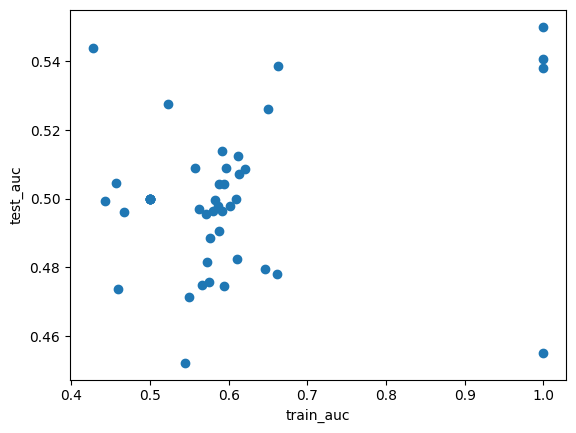

In [25]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

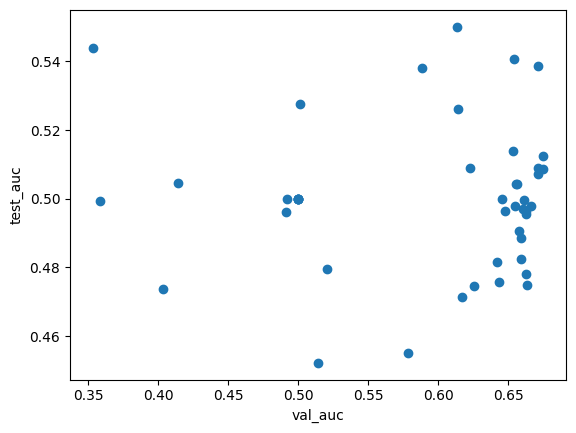

In [26]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'criterion')

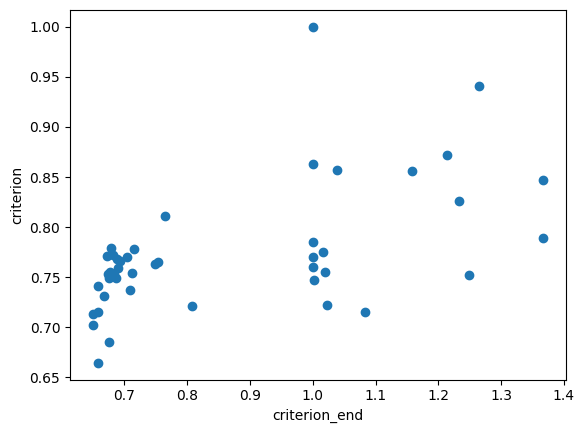

In [27]:
plt.scatter(bdd.criterion_end, bdd.criterion)
plt.xlabel("criterion_end")
plt.ylabel("criterion")

/tmp/ipykernel_2686349/1393031548.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


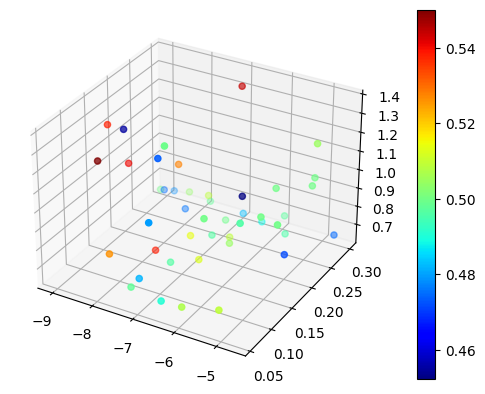

In [28]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
z = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
scat = ax.scatter(np.log(bdd.lr), bdd.drop_rate, z, c=scalarMap.to_rgba(cs))
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_2686349/3606356904.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


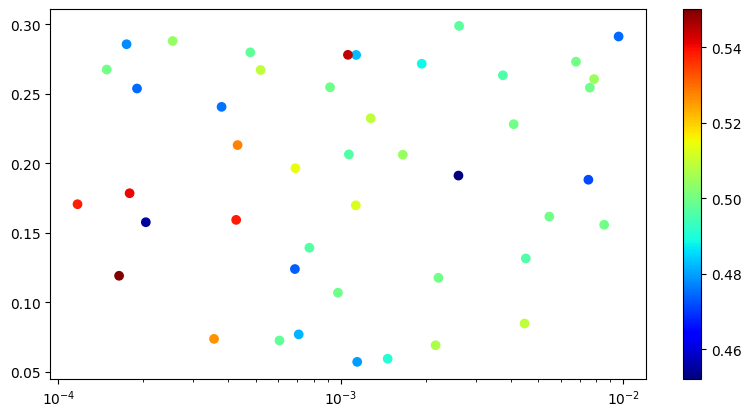

In [29]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_2686349/295477420.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


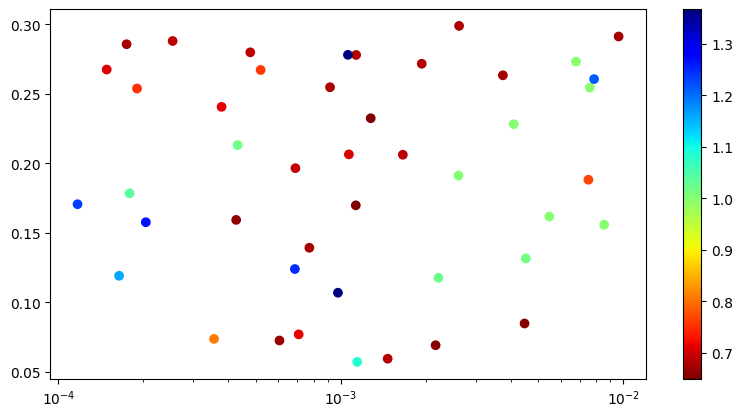

In [30]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet_r'
cm = plt.get_cmap(colorsMap)
cs = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

Text(0, 0.5, 'val_auc')

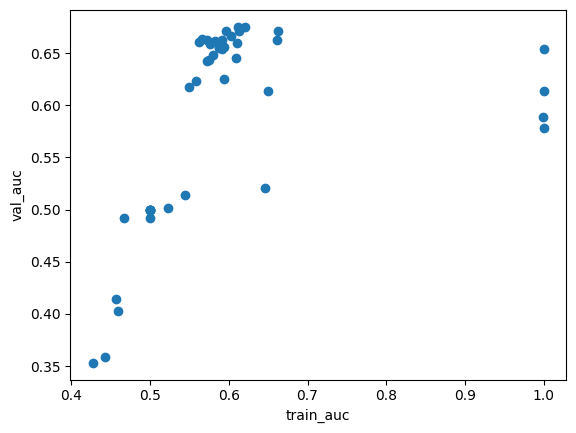

In [31]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

In [32]:
bdd.sort_values(by=['criterion_end'], ascending=True)

,model_path,best_train_auc,best_val_auc,best_test_auc,train_auc,val_auc,test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end_old,criterion_end
29,/volatile/jc225751/Runs/61_classifier_regresse...,0.611030,0.675941,0.511111,0.611481,0.675286,0.512554,0.169780,0.748021,0.001129,138.625229,0.713029,0.713233,0.649427
35,/volatile/jc225751/Runs/61_classifier_regresse...,0.621314,0.676596,0.513997,0.620608,0.674959,0.508802,0.232472,0.803834,0.001275,138.293564,0.702091,0.704433,0.650082
19,/volatile/jc225751/Runs/61_classifier_regresse...,0.611886,0.672995,0.508802,0.613058,0.671358,0.507071,0.069102,0.758986,0.002164,138.560638,0.715118,0.715583,0.657283
3,/volatile/jc225751/Runs/61_classifier_regresse...,0.591470,0.666939,0.505051,0.596690,0.671358,0.509091,0.084759,0.895390,0.004469,138.633179,0.741591,0.731951,0.657283
6,/volatile/jc225751/Runs/61_classifier_regresse...,0.661058,0.674304,0.540548,0.662906,0.671031,0.538528,0.159312,0.822529,0.000426,138.078537,0.664638,0.666063,0.657938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,/volatile/jc225751/Runs/61_classifier_regresse...,0.887836,0.687398,0.471284,0.998873,0.588543,0.537951,0.170592,0.732636,0.000117,129.762222,0.825642,1.233243,1.233243
34,/volatile/jc225751/Runs/61_classifier_regresse...,0.580473,0.667594,0.498701,0.459069,0.403273,0.473593,0.123941,0.984174,0.000687,138.648239,0.751933,1.249249,1.249249
16,/volatile/jc225751/Runs/61_classifier_regresse...,0.887745,0.649100,0.492641,1.000000,0.578396,0.454978,0.157628,0.867762,0.000204,100.978981,0.940446,1.264812,1.264812
31,/volatile/jc225751/Runs/61_classifier_regresse...,0.564210,0.588543,0.490476,0.442430,0.358756,0.499423,0.106895,0.953959,0.000976,138.618423,0.847247,1.366162,1.366162
